# MODELOS
Annette Pamela Ruiz Abreu - A01423595

In [270]:
# Librerías

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold
from sklearn import tree

from IPython.display import Image as PImage
from subprocess import check_call


from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

from kneed import KneeLocator

import warnings
warnings.filterwarnings("ignore")


In [271]:
# Datos
datos = pd.read_excel("Datos Finales/EnjoyersV2.xlsx").drop(columns=["Unnamed: 0.1", "Unnamed: 0"])

In [272]:
datos.head()

,Año,Mes,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,...,P3,Comentario para OSF,P5.1,P5.2,P5.3,P5.4,Comentario general,Tipo comentario,OSF,Comentario traducido
0,2021,4,100,207,4,5,4,5,4,5,...,1,Me gustó mucho la causa a la que se estaba apo...,4,5,5,5,Es complicado conseguir colaboraciones en esto...,Reconocimiento,León Ortigosa ABP,It is difficult to get collaborations in these...
1,2021,4,100,168,4,4,4,4,2,4,...,1,"Me gustó el servicio, pero me hubiera gustado ...",4,4,4,4,"Pues ojalá que ahora sí me valgan mis horas, n...",Reconocimiento,"Comenzar de Nuevo, A.C.","Well, I hope that now my hours are worth it, n..."
2,2021,4,100,349,4,5,5,5,5,5,...,1,Muchas gracias por el apoyo y la oportunidad d...,5,5,5,5,Lo único que me desagrado del servicio fue la ...,Área de oportunidad,"Casa Paterna La Gran Familia, A.C.",The only thing I disliked about the service wa...
3,2021,4,100,245,5,5,5,3,3,5,...,1,¡Muchas gracias por la experiencia!,5,5,5,5,Me gusto mucho la experiencia por la apertura ...,Reconocimiento,"Programa de Acompañamiento de Servicio Social,...",I really liked the experience because of the o...
4,2021,4,100,151,4,3,3,3,4,5,...,1,Muchas gracias por todo.,4,4,4,4,"No sentí que mi trabajo tuviera impacto, fue m...",Área de oportunidad,Casa Monarca Ayuda Humanitaria al Migrante A.B.P.,"I did not feel that my work had an impact, it ..."


### Análisis de sentimiento

In [273]:
# Comenarios vacíos
datos["Comentario traducido"].fillna(".",inplace=True)

In [274]:
sentiment = SentimentIntensityAnalyzer()

datos["sentimiento"] = [sentiment.polarity_scores(datos["Comentario traducido"][i])["compound"] for i in range(10493)]


In [275]:
datos["sentimiento"].unique()


array([ 0.4767,  0.3979, -0.6249, ...,  0.7125,  0.7549,  0.3472])

In [276]:
datos.head()

,Año,Mes,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,...,Comentario para OSF,P5.1,P5.2,P5.3,P5.4,Comentario general,Tipo comentario,OSF,Comentario traducido,sentimiento
0,2021,4,100,207,4,5,4,5,4,5,...,Me gustó mucho la causa a la que se estaba apo...,4,5,5,5,Es complicado conseguir colaboraciones en esto...,Reconocimiento,León Ortigosa ABP,It is difficult to get collaborations in these...,0.4767
1,2021,4,100,168,4,4,4,4,2,4,...,"Me gustó el servicio, pero me hubiera gustado ...",4,4,4,4,"Pues ojalá que ahora sí me valgan mis horas, n...",Reconocimiento,"Comenzar de Nuevo, A.C.","Well, I hope that now my hours are worth it, n...",0.3979
2,2021,4,100,349,4,5,5,5,5,5,...,Muchas gracias por el apoyo y la oportunidad d...,5,5,5,5,Lo único que me desagrado del servicio fue la ...,Área de oportunidad,"Casa Paterna La Gran Familia, A.C.",The only thing I disliked about the service wa...,-0.6249
3,2021,4,100,245,5,5,5,3,3,5,...,¡Muchas gracias por la experiencia!,5,5,5,5,Me gusto mucho la experiencia por la apertura ...,Reconocimiento,"Programa de Acompañamiento de Servicio Social,...",I really liked the experience because of the o...,0.6697
4,2021,4,100,151,4,3,3,3,4,5,...,Muchas gracias por todo.,4,4,4,4,"No sentí que mi trabajo tuviera impacto, fue m...",Área de oportunidad,Casa Monarca Ayuda Humanitaria al Migrante A.B.P.,"I did not feel that my work had an impact, it ...",0.0000


In [277]:
datos.to_csv("Datos_sentimiento")

## Regresión lineal

Se intentará predecir la columna P1.1 que pregunta sobre qué tan satisfecho está el alumno

In [278]:
X = datos.drop(columns=["Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido"])
Y = datos["P1.1"]


In [279]:
label_encoder = LabelEncoder()
labels = {}

X["Tipo comentario"] = label_encoder.fit_transform(datos["Tipo comentario"])

X.head()



,Año,Mes,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P2,P3,P5.1,P5.2,P5.3,P5.4,Tipo comentario,sentimiento
0,2021,4,5,4,5,4,5,5,5,1,1,4,5,5,5,0,0.4767
1,2021,4,4,4,4,2,4,4,1,1,1,4,4,4,4,0,0.3979
2,2021,4,5,5,5,5,5,5,4,1,1,5,5,5,5,1,-0.6249
3,2021,4,5,5,3,3,5,5,5,1,1,5,5,5,5,0,0.6697
4,2021,4,3,3,3,4,5,5,2,1,1,4,4,4,4,1,0.0000


In [280]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=9)

In [281]:
# Create an instance of the Linear Regression model
reg = LinearRegression()

# Fit the data to the Linear Regression model (train the model)
reg.fit(X_train,Y_train)


LinearRegression()

In [282]:
pd.DataFrame(reg.coef_, index=X.columns, columns =["Coeficients"])

,Coeficients
Año,0.026779
Mes,0.002091
P1.2,0.331702
P1.3,0.149126
P1.4,0.089898
P1.5,0.009617
P1.6,0.217646
P1.7,0.073005
P1.8,0.043137
P2,-0.003602


In [283]:
pd.DataFrame([reg.intercept_], columns =["Intercept"])

,Intercept
0,-53.944193


In [284]:
predictions = reg.predict(X_test)

In [285]:
test_rmse = np.sqrt(mean_squared_error(Y_test,predictions))

# Determination coeficient (R2)
test_r2sc = r2_score(Y_test, predictions)

# Remember the lower the value is the better it is
print("Square root of the mean squared error",test_rmse)


# The closer to 1 the better
print("Determination Coeficient",test_r2sc)

Square root of the mean squared error 0.38537523435784365
Determination Coeficient 0.7252759554514773


In [286]:
print(f"Accuracy on test set: {round(reg.score(X_test,Y_test),2)}")

Accuracy on test set: 0.73


## Árboles de decisión

In [287]:
# Búsqueda del mejor árbol de decisión

cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(datos))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(datos):
        f_train = datos.loc[train_fold] 
        f_valid = datos.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(["Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"], axis=1), 
                               y = f_train["P1.1"]) 
        valid_acc = model.score(X = f_valid.drop(["Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"], axis=1), 
                                y = f_valid["P1.1"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))


 Max Depth  Average Accuracy
         1          0.805598
         2          0.818368
         3          0.822942
         4          0.824180
         5          0.828088
         6          0.829136
         7          0.825990
         8          0.824656
         9          0.823225
        10          0.823415
        11          0.816934
        12          0.815219
        13          0.814074
        14          0.813122
        15          0.812645
        16          0.811311
        17          0.812073
        18          0.811882
        19          0.812359
        20          0.811692
        21          0.811216
        22          0.812073
        23          0.812263
        24          0.811692


In [288]:
print("Max Depth Elegido: ",df["Max Depth"][df["Average Accuracy"] == df["Average Accuracy"].max()].values)

Max Depth Elegido:  [6]


In [291]:
# Creación del árbol de decisión
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y = datos['P1.1'].values 
x = datos.drop(["Duración","P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"], axis=1).values 


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=9)


# Crear Arbol de decision con profundidad = 6
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 6,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 6,
                              impurity = True,
                              feature_names = list(datos.drop(["Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"], axis=1)),
                              # class_names = ['No', 'N1 Billboard'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
import subprocess
from PIL import Image

# ...

# Convertir el archivo .dot a .png
subprocess.run(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png'], check=True)

# Mostrar la imagen
image = Image.open('tree1.png')
image.show()



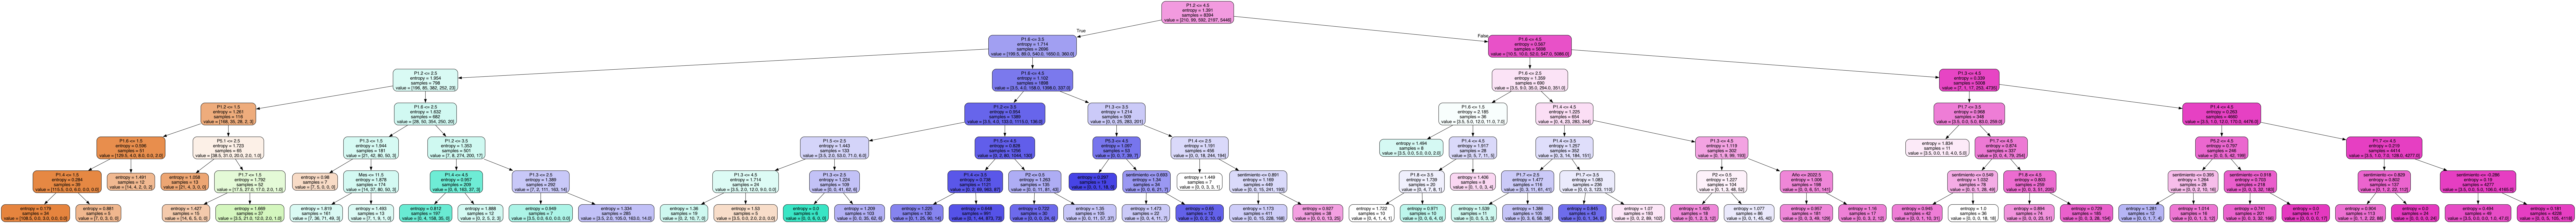

In [292]:
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

In [293]:
# Precisión
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

84.04


In [294]:
y_pred = decision_tree.predict(x_test)



In [295]:
reporte = classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           1       0.62      0.62      0.62        21
           2       0.40      0.20      0.27        20
           3       0.54      0.51      0.53       120
           4       0.75      0.75      0.75       600
           5       0.91      0.92      0.92      1338

    accuracy                           0.84      2099
   macro avg       0.64      0.60      0.62      2099
weighted avg       0.84      0.84      0.84      2099



In [296]:
C = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[1, 2, 3, 4, 5], columns=[1, 2, 3, 4, 5])
print("Matriz de confusión\n")
display(C)
display(C / C.astype(np.float).sum(axis=0))


Matriz de confusión



,1,2,3,4,5
1,13,2,5,1,0
2,2,4,12,2,0
3,5,2,61,48,4
4,1,1,30,450,118
5,0,1,4,100,1233


,1,2,3,4,5
1,0.619048,0.2,0.044643,0.001664,0.000000
2,0.095238,0.4,0.107143,0.003328,0.000000
3,0.238095,0.2,0.544643,0.079867,0.002952
4,0.047619,0.1,0.267857,0.748752,0.087085
5,0.000000,0.1,0.035714,0.166389,0.909963


## SVM

## Naive Bayes

## K-means

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [316]:
X = np.array(datos.drop(columns=["Año", "Mes", "Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"]))
y = np.array(datos["P1.1"])
X.shape

(10493, 14)

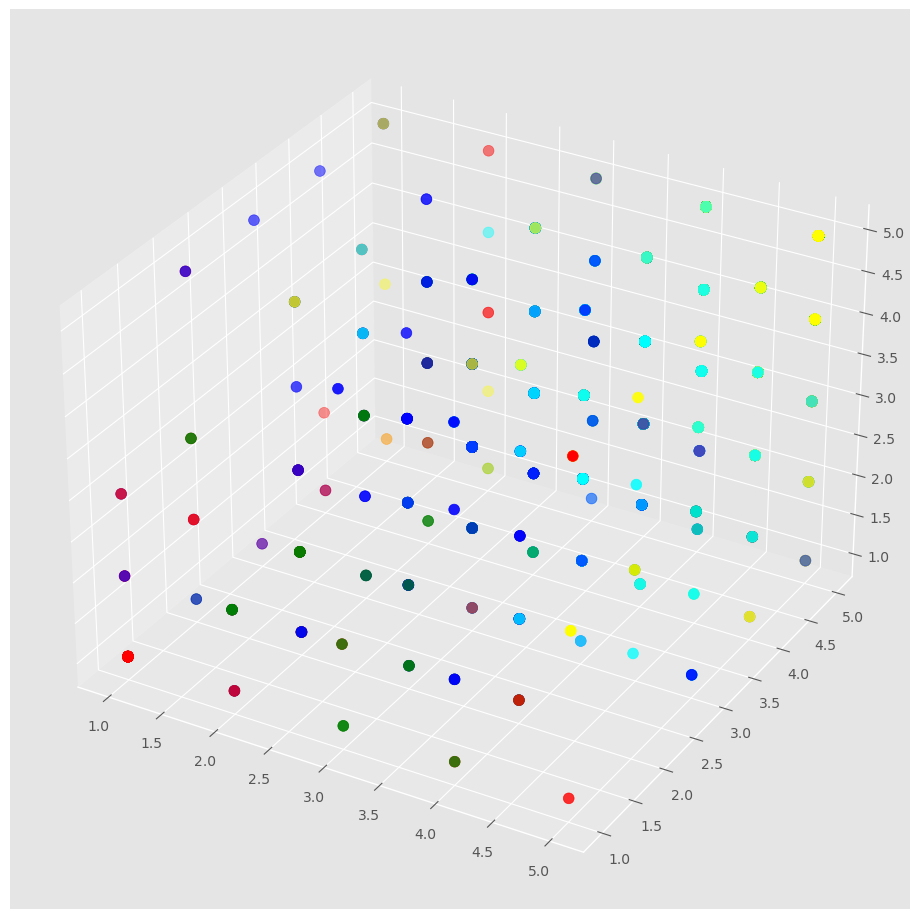

In [317]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

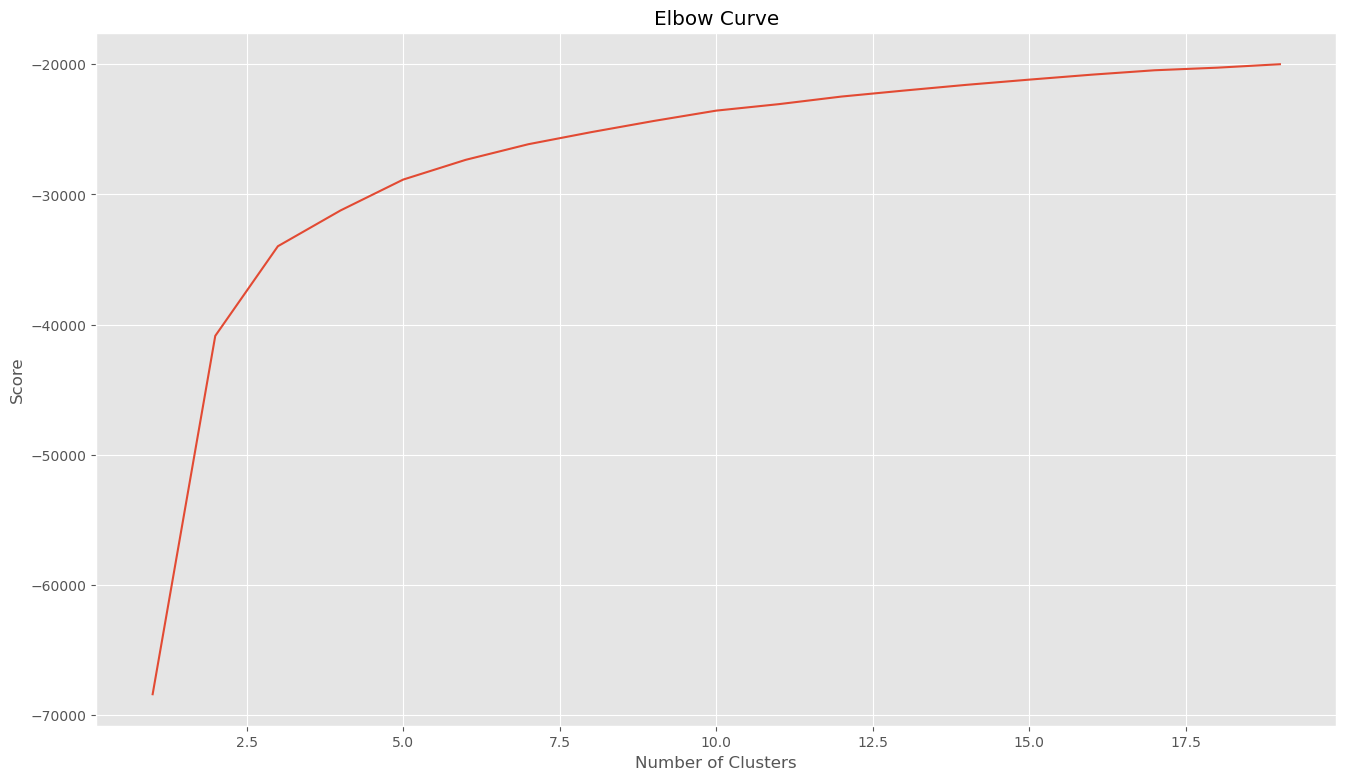

In [318]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [321]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[4.73276983 4.67815345 4.6443433  3.42197659 4.76918075 4.73927178
  4.44343303 0.88751625 0.99869961 4.68010403 4.86085826 4.8680104
  4.85630689 0.48267185]
 [4.95768688 4.94287729 4.93459097 4.94887165 4.9545134  4.95398449
  4.93794076 0.92524683 0.99841326 4.88681241 4.95380818 4.94834274
  4.95239774 0.47696007]
 [4.14950761 4.07609669 3.81826321 3.83974933 3.50313339 3.41450313
  3.63384064 0.63294539 0.98478066 4.76723366 4.8782453  4.91942704
  4.90241719 0.37814987]
 [2.85904762 2.8952381  2.45714286 2.65714286 2.33142857 2.29333333
  2.67428571 0.42666667 0.81333333 3.30857143 3.51619048 3.58095238
  3.49333333 0.14393943]
 [4.02925046 3.99695308 3.90920171 3.74954296 4.         3.98476539
  3.96343693 0.80804388 0.98110908 3.8305911  4.04387569 4.04570384
  4.01096892 0.37093382]]


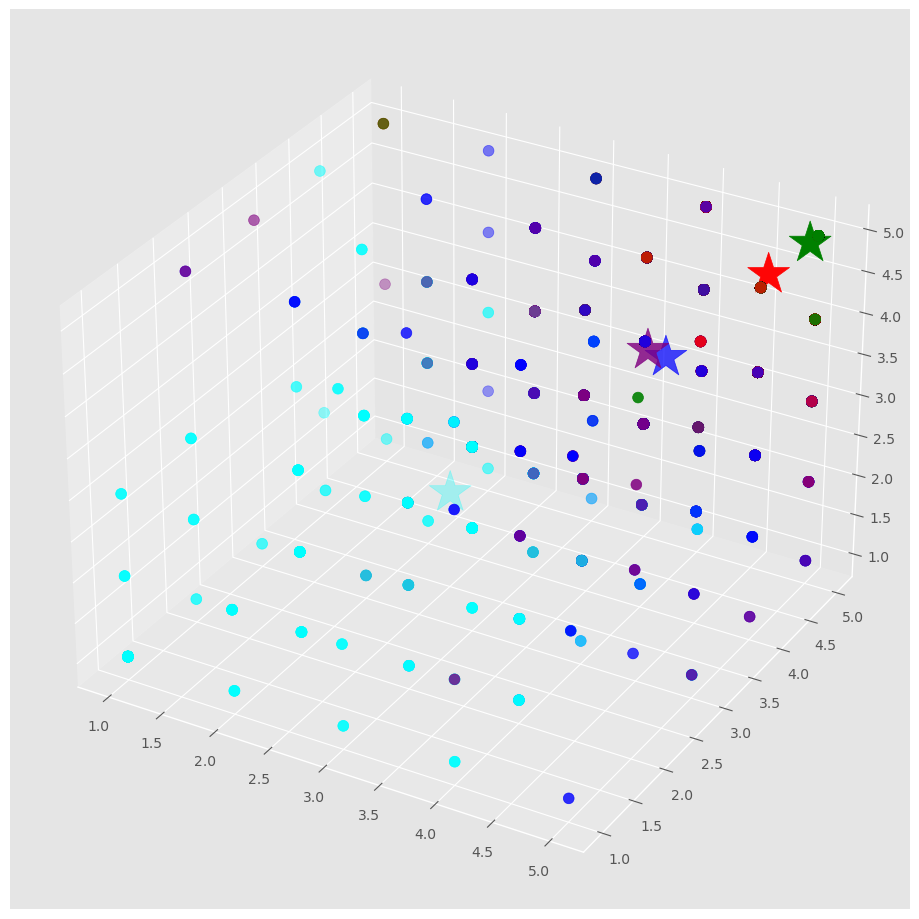

In [322]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue', 'cyan', 'purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [326]:
copy =  pd.DataFrame()
copy['OSF']=datos['OSF'].values
copy['categoria']=datos['P1.1'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cluster']=["grupo1", "grupo2", "grupo3", "group4", "group5"]
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cluster,cantidad
0,grupo1,1538
1,grupo2,5672
2,grupo3,1117
3,group4,525
4,group5,1641


In [338]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo.drop(index=[0, 1, 2], inplace=True)

In [339]:
diversidadGrupo

,categoria,cantidad
3,3,26.0
4,4,427.0
5,5,1085.0


In [340]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([1170,  976, 1305, 4246,  524])

In [341]:
users=datos['OSF'].values
for row in closest:
    print(users[row])

Dirección de Servicio Social
Hagámoslo Bien por una Cultura de la Legalidad, A.C.
Dirección de Servicio Social
CIES, Centro de Investigación y Educación para la Salud, A.C.
CONAFE, Consejo Nacional de Fomento Educativo


In [343]:
for i in closest:
    display(pd.DataFrame(datos.iloc[i]))

,1170
Año,2021
Mes,7
Progreso,100
Duración,211
P1.1,5
P1.2,5
P1.3,5
P1.4,5
P1.5,3
P1.6,5


,976
Año,2021
Mes,6
Progreso,100
Duración,120
P1.1,5
P1.2,5
P1.3,5
P1.4,5
P1.5,5
P1.6,5


,1305
Año,2021
Mes,7
Progreso,100
Duración,147
P1.1,4
P1.2,4
P1.3,4
P1.4,4
P1.5,4
P1.6,4


,4246
Año,2021
Mes,12
Progreso,100
Duración,2485
P1.1,3
P1.2,3
P1.3,3
P1.4,2
P1.5,3
P1.6,3


,524
Año,2021
Mes,6
Progreso,100
Duración,87
P1.1,4
P1.2,4
P1.3,4
P1.4,4
P1.5,4
P1.6,4


In [365]:
X_new = np.array([[5, 5, 2, 4, 3, 4, 4, 0, 1, 1, 1, 1, 1, 0.7]])
new_labels = kmeans.predict(X_new)
print(new_labels)


[3]
